# Лекция 5. Кластерный анализ

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                   RobustScaler)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
# Import the dendrogram function and the ward clustering function from SciPy:
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling

# Иерархический кластерный анализ

### Предварительная обработка и шкалирование (стандартизация)

In [2]:
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [3]:
def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Original Data")
    other_axes = [plt.subplot2grid((2, 4), (i, j))
                  for j in range(2, 4) for i in range(2)]

    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')


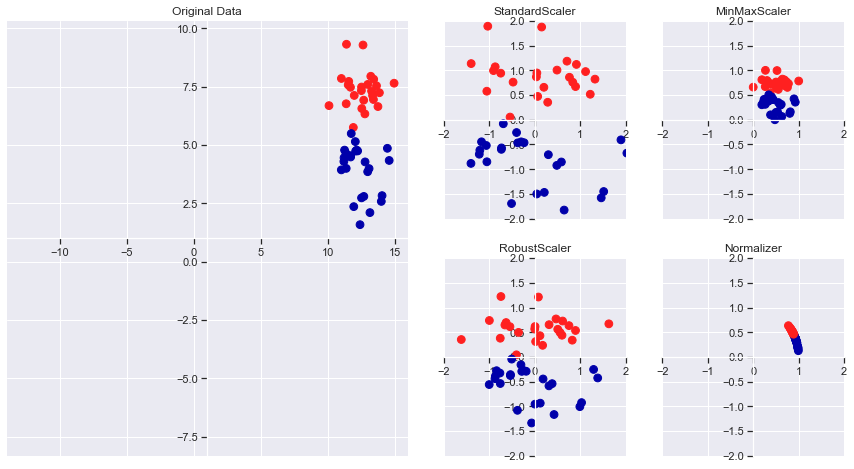

In [4]:
plot_scaling()

#### Applying Data Transformations

In [8]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [12]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [13]:
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

### Агломеративная кластеризация

In [14]:
def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=12)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(20, 8))

    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("Step %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("Initialization")

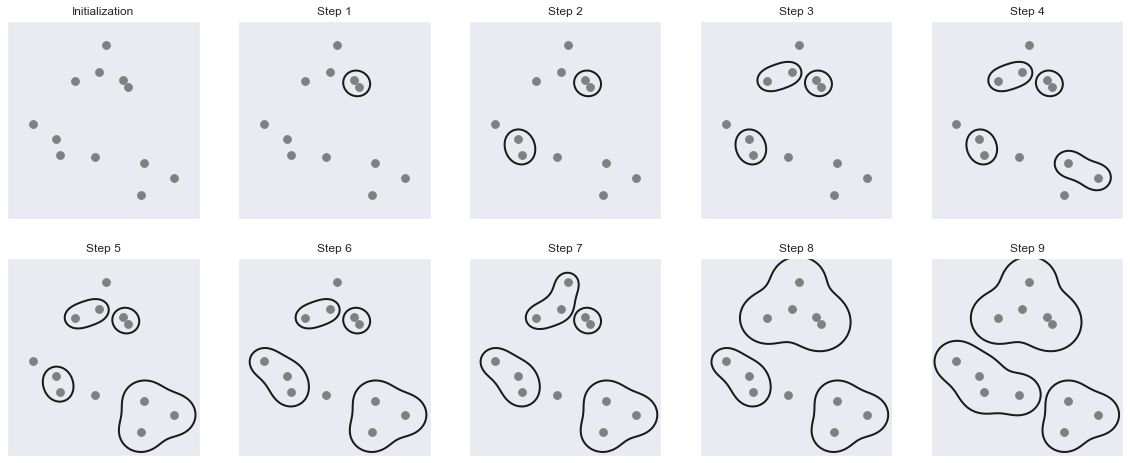

In [15]:
plot_agglomerative_algorithm()

In [16]:
X, y = make_blobs(random_state=1)

In [17]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

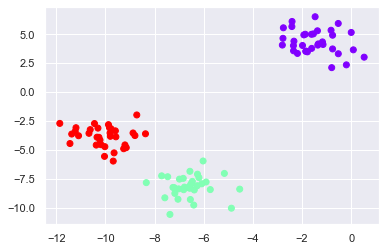

In [18]:
plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')

In [19]:
def plot_agglomerative():
    X, y = make_blobs(random_state=0, n_samples=12)
    agg = AgglomerativeClustering(n_clusters=3)

    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    ax = plt.gca()
    for i, x in enumerate(X):
        ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

    ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
    ax.set_xticks(())
    ax.set_yticks(())

    for i in range(11):
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)

        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

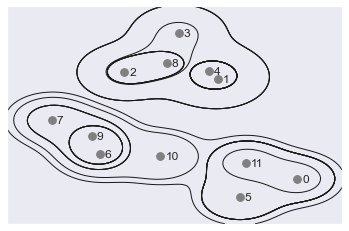

In [20]:
plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

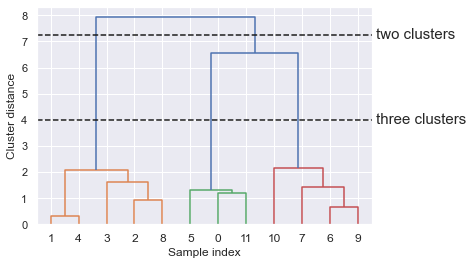

In [21]:
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# Кластеризация методом k-средних

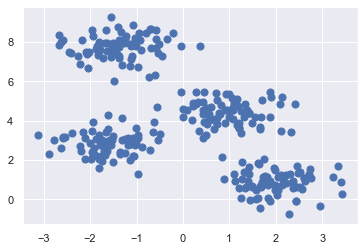

In [22]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

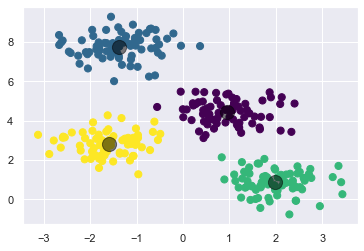

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);